In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
'''
W: operative conditions (Scenario descriptors): 작동조건
X_s: measured signals: 측정된 신호
X_v: virtual sensors: 가상 센서
T(theta): engine health parameters: 엔진 상태 매개변수
Y: RUL [in cycles]
A: auxiliary data: 보조 데이터
'''

'\nW: operative conditions (Scenario descriptors): 작동조건\nX_s: measured signals: 측정된 신호\nX_v: virtual sensors: 가상 센서\nT(theta): engine health parameters: 엔진 상태 매개변수\nY: RUL [in cycles]\nA: auxiliary data: 보조 데이터\n'

In [3]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS01-005.h5'

In [4]:
with h5py.File(filename, 'r') as hdf:
        # Development(training) set
        W_dev = np.array(hdf.get('W_dev'))             # W 
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print ("number of training samples(timestamps): ", Y_dev.shape[0])
print ("number of testing  samples(timestamps): ", Y_test.shape[0])
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("Y shape: " + str(Y.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.03332885
number of training samples(timestamps):  4906636
number of testing  samples(timestamps):  2735232

W shape: (7641868, 4)
X_s shape: (7641868, 14)
X_v shape: (7641868, 14)
T shape: (7641868, 10)
Y shape: (7641868, 1)
A shape: (7641868, 4)


In [6]:
print ("X_s_dev shape: " + str(X_s_dev.shape))
print ("X_s_test shape: " + str(X_s_test.shape))

X_s_dev shape: (4906636, 14)
X_s_test shape: (2735232, 14)


In [9]:
pd.DataFrame(X_s_dev,  columns=X_s_var).head()

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,600.148034,1438.498187,1818.027714,1228.129848,15.806267,11.577097,16.046971,20.126624,331.293679,336.631827,12.629361,2160.926416,8591.373490,3.855337
1,600.055894,1438.350208,1817.682618,1227.879113,15.795477,11.568235,16.036017,20.113218,331.109867,336.446748,12.623033,2160.909333,8590.972866,3.852319
2,600.210756,1439.109101,1820.020627,1229.422522,15.807747,11.574866,16.048474,20.130956,331.753181,337.082502,12.637951,2161.819062,8593.031745,3.866201
3,600.369717,1439.240230,1819.188327,1228.538726,15.816360,11.578198,16.057218,20.146716,331.819136,337.162828,12.631509,2162.768666,8593.781545,3.863328
4,600.298227,1439.064004,1818.963540,1228.389046,15.807513,11.571593,16.048236,20.135888,331.626003,336.966936,12.624872,2162.619544,8593.220200,3.860818


In [10]:
pd.DataFrame(W_var)

,0
0,alt
1,Mach
2,TRA
3,T2


In [11]:
pd.DataFrame(X_s_var)

,0
0,T24
1,T30
2,T48
3,T50
4,P15
5,P2
6,P21
7,P24
8,Ps30
9,P40


In [12]:
pd.DataFrame(X_v_var)

,0
0,T40
1,P30
2,P45
3,W21
4,W22
5,W25
6,W31
7,W32
8,W48
9,W50


In [13]:
pd.DataFrame(T_var)

,0
0,fan_eff_mod
1,fan_flow_mod
2,LPC_eff_mod
3,LPC_flow_mod
4,HPC_eff_mod
5,HPC_flow_mod
6,HPT_eff_mod
7,HPT_flow_mod
8,LPT_eff_mod
9,LPT_flow_mod


In [14]:
pd.DataFrame(A_var)

,0
0,unit
1,cycle
2,Fc
3,hs


In [15]:
A.T.shape

(4, 6517190)

In [20]:
print(df_A.columns)

Index(['unit', 'cycle', 'Fc', 'hs'], dtype='object')


In [21]:
print('Engine units in df: ', np.unique(df_A['unit']))
print('Engine units count in df: ', df_A['unit'].nunique())

Engine units in df:  [ 2.  5. 10. 11. 14. 15. 16. 18. 20.]
Engine units count in df:  9


In [22]:
print('Engine units in df: ', np.unique(df_A['cycle']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]


In [23]:
max_cycle_per_unit = df_A.groupby('unit')['cycle'].max()

print(max_cycle_per_unit)

unit
2.0     75.0
5.0     89.0
10.0    82.0
11.0    59.0
14.0    76.0
15.0    67.0
16.0    63.0
18.0    71.0
20.0    66.0
Name: cycle, dtype: float64


In [24]:
count_per_unit = df_A['unit'].value_counts().sort_index()
count_per_unit

2.0      853142
5.0     1033420
10.0     952711
11.0     663495
14.0     156778
15.0     433470
16.0     765295
18.0     890719
20.0     768160
Name: unit, dtype: int64

In [35]:
df_A.T

,0,1,2,3,4,5,6,7,8,9,...,6517180,6517181,6517182,6517183,6517184,6517185,6517186,6517187,6517188,6517189
unit,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
cycle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
Fc,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
hs,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


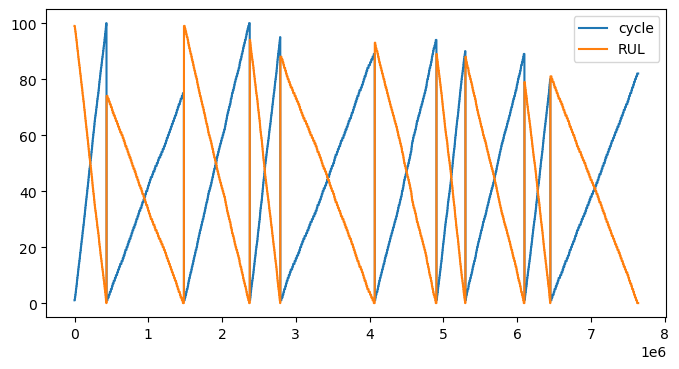

In [8]:
plt.figure(figsize=(8, 4))

# 플롯 생성
plt.plot(df_A['cycle'], label='cycle')
plt.plot(Y, label='RUL')

# 범례 표시
plt.legend()

# 그림을 화면에 표시
plt.show()


In [15]:
'''
Illusration of Multivariate time-series of condition monitoring sensors readings for Unit5 (fifth engine)

W: operative conditions (Scenario descriptors) - ['alt', 'Mach', 'TRA', 'T2']
X_s: measured signals - ['T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf']
X_v: virtual sensors - ['T40', 'P30', 'P45', 'W21', 'W22', 'W25', 'W31', 'W32', 'W48', 'W50', 'SmFan', 'SmLPC', 'SmHPC', 'phi']
T(theta): engine health parameters - ['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod', 'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod', 'LPT_flow_mod']
Y: RUL [in cycles]
A: auxiliary data - ['unit', 'cycle', 'Fc', 'hs']
'''
# W_var = list(np.array(W_var, dtype='U20'))
# X_s_var = list(np.array(X_s_var, dtype='U20'))  
# X_v_var = list(np.array(X_v_var, dtype='U20')) 
# T_var = list(np.array(T_var, dtype='U20'))
# A_var = list(np.array(A_var, dtype='U20'))
                          
df_W = DataFrame(data=W, columns=W_var)
df_Xs = DataFrame(data=X_s, columns=X_s_var)
df_Xv = DataFrame(data=X_v, columns=X_v_var)
df_T = DataFrame(data=T, columns=T_var)
df_Y = DataFrame(data=Y, columns=['RUL'])
df_A = DataFrame(data=A, columns=A_var)



In [ ]:
df_all = pd.concat([df_W, df_Xs, df_Xv, df_T, df_Y, df_A], axis=1)

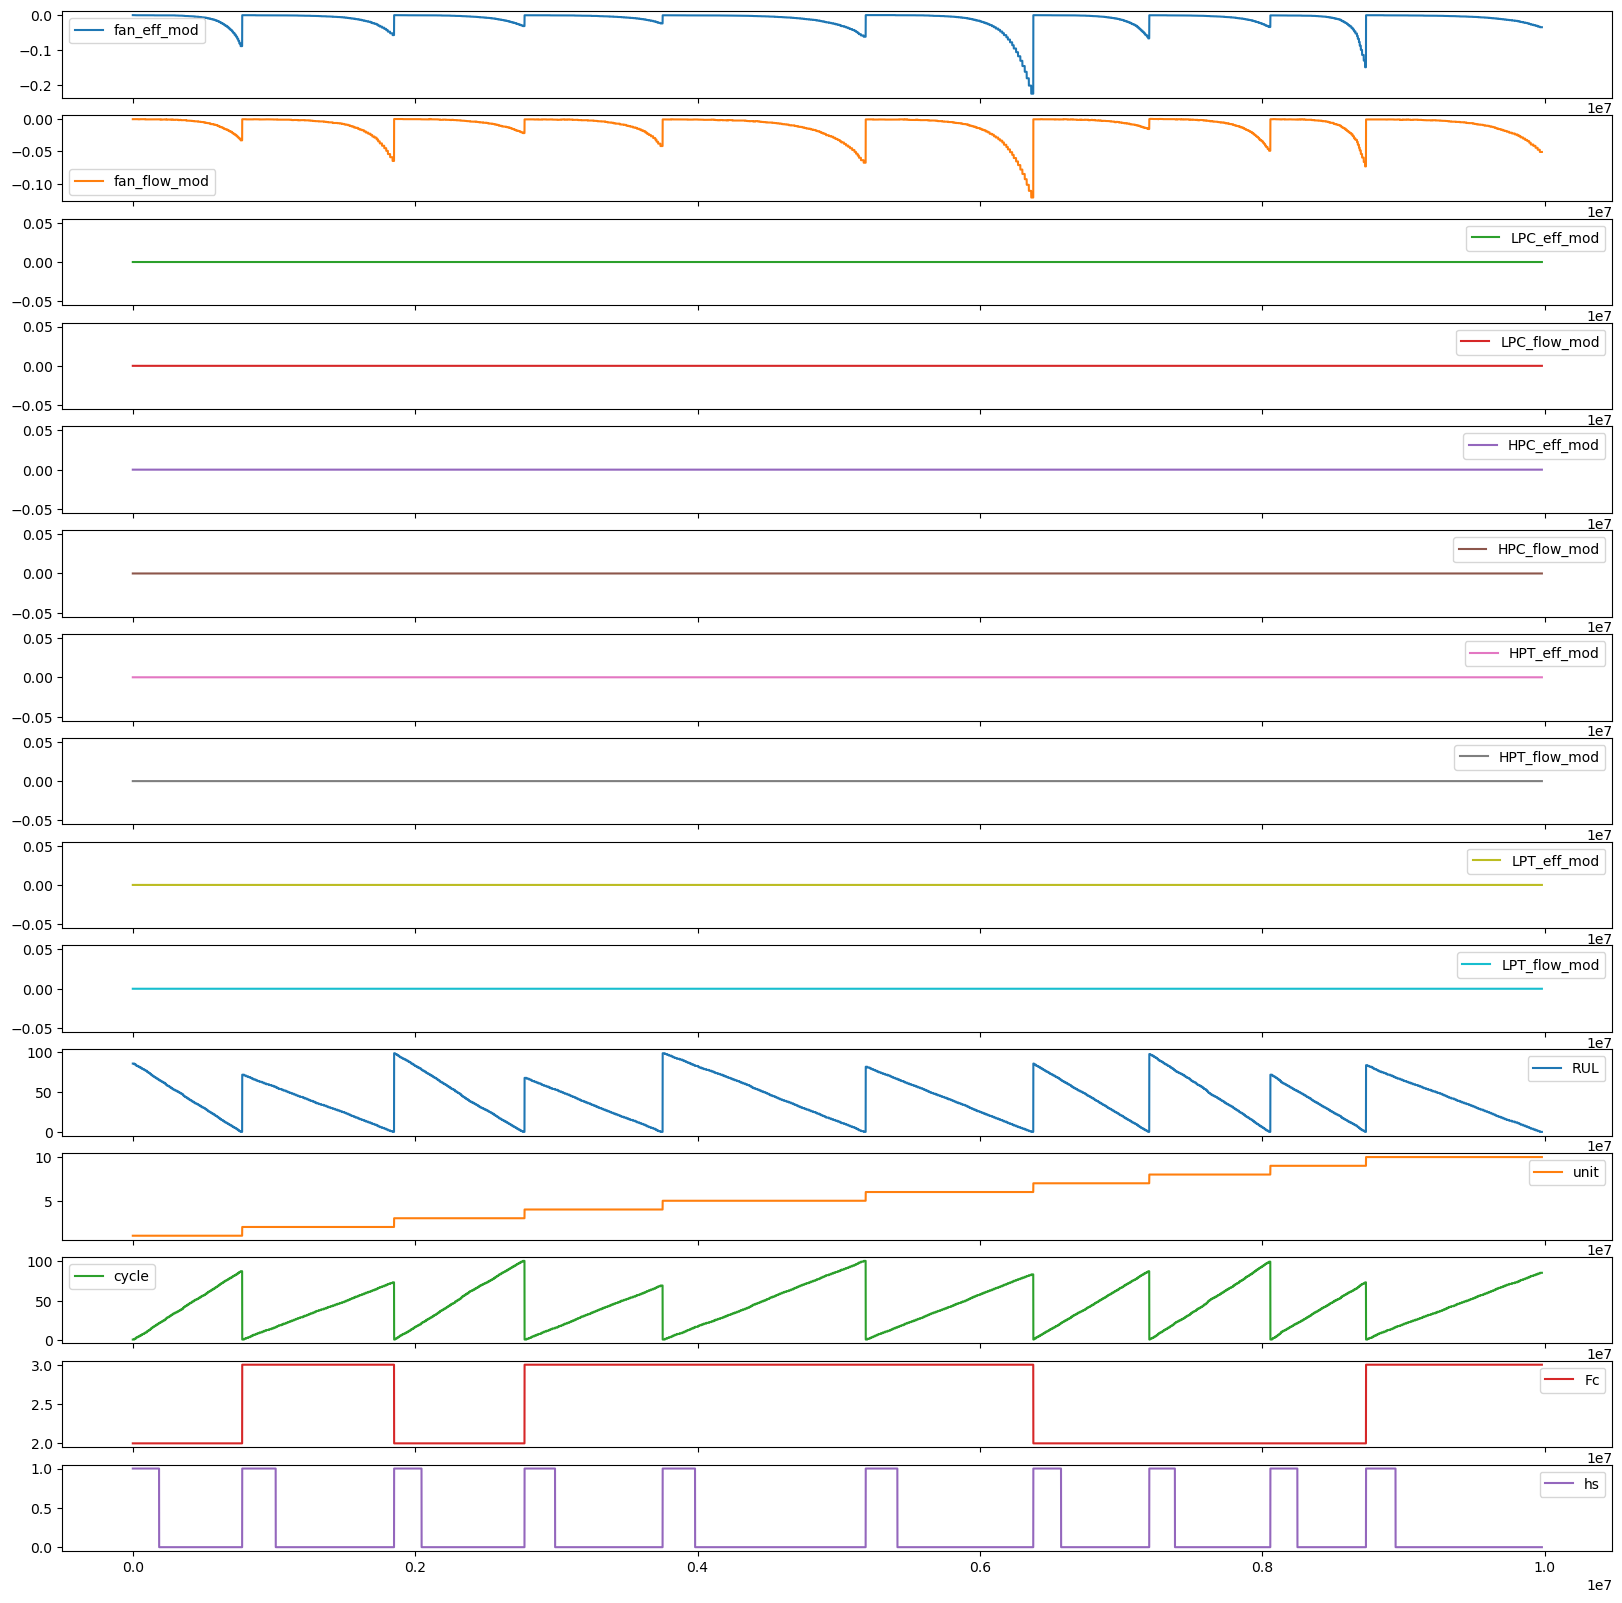

In [18]:
t = df_all[T_var+ ['RUL'] + A_var].plot(subplots=True, figsize=(20, 20))


In [ ]:
t = df_u1[X_s_var + T_var+ ['RUL'] + A_var].plot(subplots=True, figsize=(20, 20))

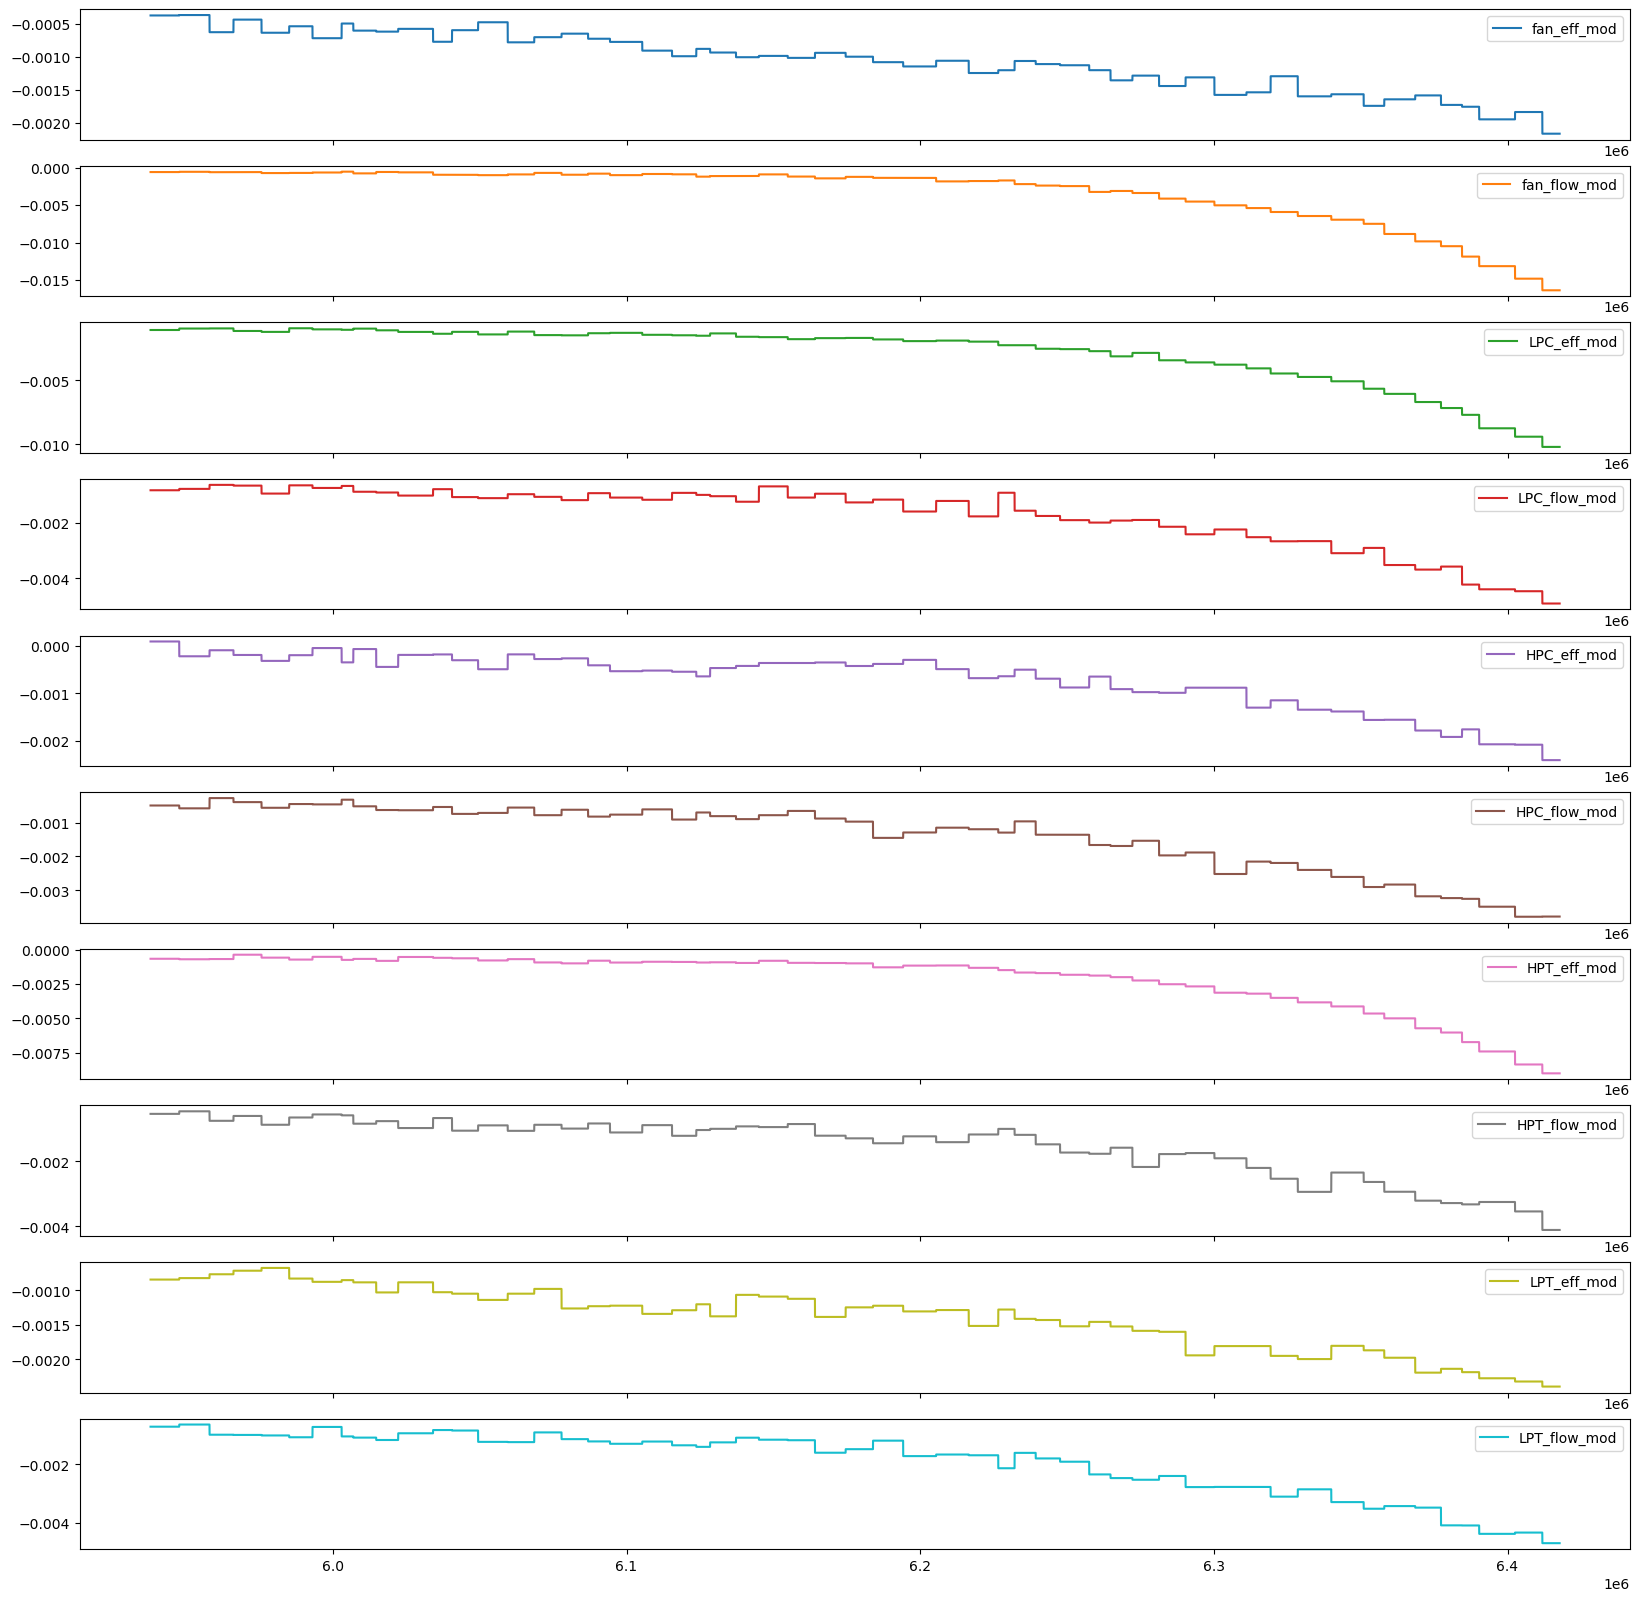

In [79]:
hs_u4 = df_u4[T_var].plot(subplots=True, figsize=(20, 20))

            alt      Mach        TRA          T2         T24          T30  \
5937934  3001.0  0.327852  79.716232  518.885555  623.439529  1501.629111   
5937935  3007.0  0.325143  79.716232  518.686373  623.273716  1501.392157   
5937936  3008.0  0.325710  79.716232  518.725633  623.268872  1501.348453   
5937937  3023.0  0.330624  79.716232  518.987697  623.524655  1501.723526   
5937938  3026.0  0.326844  79.716232  518.729834  623.327167  1501.386720   
...         ...       ...        ...         ...         ...          ...   
5957997  3039.0  0.302967  40.956741  517.153460  583.610979  1337.658682   
5957998  3031.0  0.301140  39.814171  517.073729  583.000125  1332.551054   
5957999  3025.0  0.300636  38.671600  517.063051  581.722433  1326.927916   
5958000  3015.0  0.301392  38.144260  517.146789  580.925766  1324.785483   
5958001  3007.0  0.301896  38.056370  517.204329  580.727401  1324.633585   

                 T48          T50        P15         P2  ...         W50  \

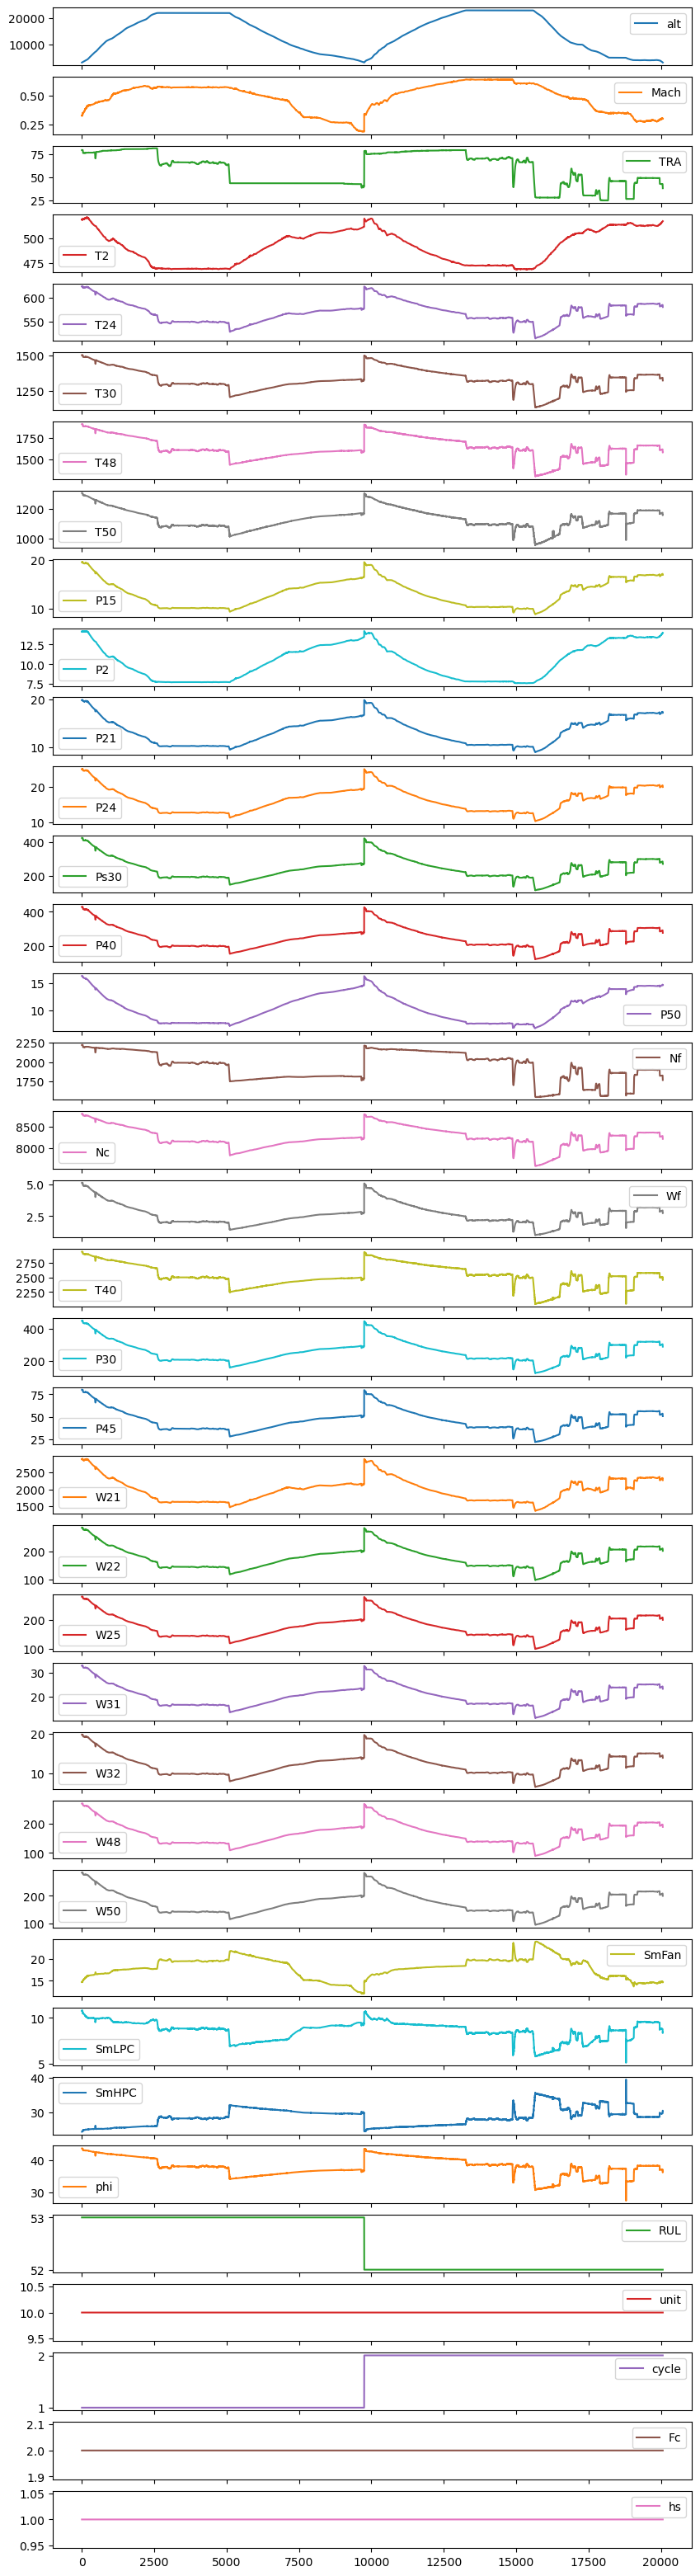

In [73]:
df_u10_c1 = df_u10[df_u10['cycle'] == np.float64(1.0) ]
df_u10_c1 = df_u10_c1.drop(columns=T_var )
df_u10_c2 = df_u10[df_u10['cycle'] == np.float64(2.0) ]
df_u10_c2 = df_u10_c2.drop(columns=T_var )
df_u10_c12 = pd.concat([df_u10_c1, df_u10_c2])

print (df_u10_c12)
df_u5_c12 = df_u10_c12.reset_index(drop=True)
print (df_u5_c12)
t = df_u5_c12.plot(subplots=True, figsize=(10, 40))

In [74]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])
     

Unit: 1.0 - Number of flight cyles (t_{EOF}):  53
Unit: 2.0 - Number of flight cyles (t_{EOF}):  52
Unit: 3.0 - Number of flight cyles (t_{EOF}):  53
Unit: 4.0 - Number of flight cyles (t_{EOF}):  48
Unit: 5.0 - Number of flight cyles (t_{EOF}):  50
Unit: 6.0 - Number of flight cyles (t_{EOF}):  60
Unit: 7.0 - Number of flight cyles (t_{EOF}):  62
Unit: 8.0 - Number of flight cyles (t_{EOF}):  62
Unit: 9.0 - Number of flight cyles (t_{EOF}):  59
Unit: 10.0 - Number of flight cyles (t_{EOF}):  54


In [75]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1 train': 'C0', 'Unit 2 train': 'C1', 'Unit 3 train': 'C2', 'Unit 4 train': 'C3', 'Unit 5 train': 'C4', 'Unit 6 train': 'C5',
                      'Unit 7 train': 'C6', 'Unit 8 train': 'C7', 'Unit 9 train': 'C8', 'Unit 10 train': 'C9', 'Unit 11 test': 'C10',
                      'Unit 12 train': 'C11', 'Unit 13 train': 'C12', 'Unit 14 test': 'C13', 'Unit 15 test': 'C14', 'Unit 16 train': 'C15',
                      'Unit 17 train': 'C16', 'Unit 18 train': 'C17', 'Unit 19 train': 'C18', 'Unit 20 train': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()
     

Unit: 1.0 - Number of flight cyles (t_{EOF}):  53
Unit: 2.0 - Number of flight cyles (t_{EOF}):  52
Unit: 3.0 - Number of flight cyles (t_{EOF}):  53
Unit: 4.0 - Number of flight cyles (t_{EOF}):  48
Unit: 5.0 - Number of flight cyles (t_{EOF}):  50
Unit: 6.0 - Number of flight cyles (t_{EOF}):  60
Unit: 7.0 - Number of flight cyles (t_{EOF}):  62
Unit: 8.0 - Number of flight cyles (t_{EOF}):  62
Unit: 9.0 - Number of flight cyles (t_{EOF}):  59
Unit: 10.0 - Number of flight cyles (t_{EOF}):  54
{'Unit 1': 14924, 'Unit 2': 14651, 'Unit 3': 14506, 'Unit 4': 14671, 'Unit 5': 14872, 'Unit 6': 8839, 'Unit 7': 8758, 'Unit 8': 8963, 'Unit 9': 9140, 'Unit 10': 8885}


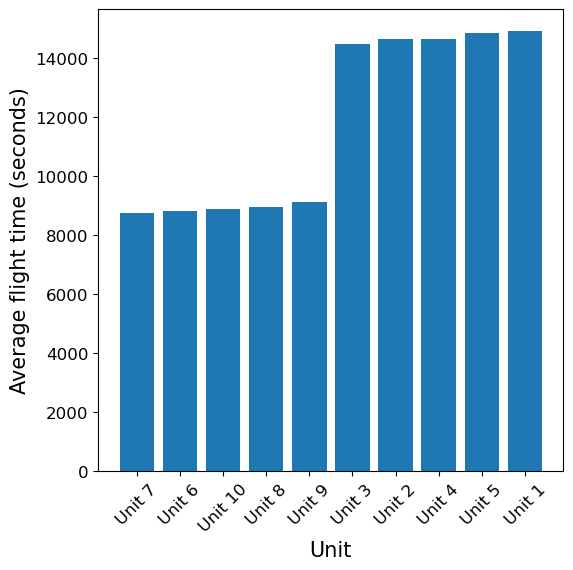

/var/folders/7d/d1khjvv95fs1dx3zplr2sfzh0000gn/T/ipykernel_12960/888390774.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/7d/d1khjvv95fs1dx3zplr2sfzh0000gn/T/ipykernel_12960/888390774.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/7d/d1khjvv95fs1dx3zplr2sfzh0000gn/T/ipykernel_12960/888390774.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/7d/d1khjvv95fs1dx3zplr2sfzh0000gn/T/ipykernel_12960/888390774.py:21: FutureWarning: 

`shade`

<Figure size 640x480 with 0 Axes>

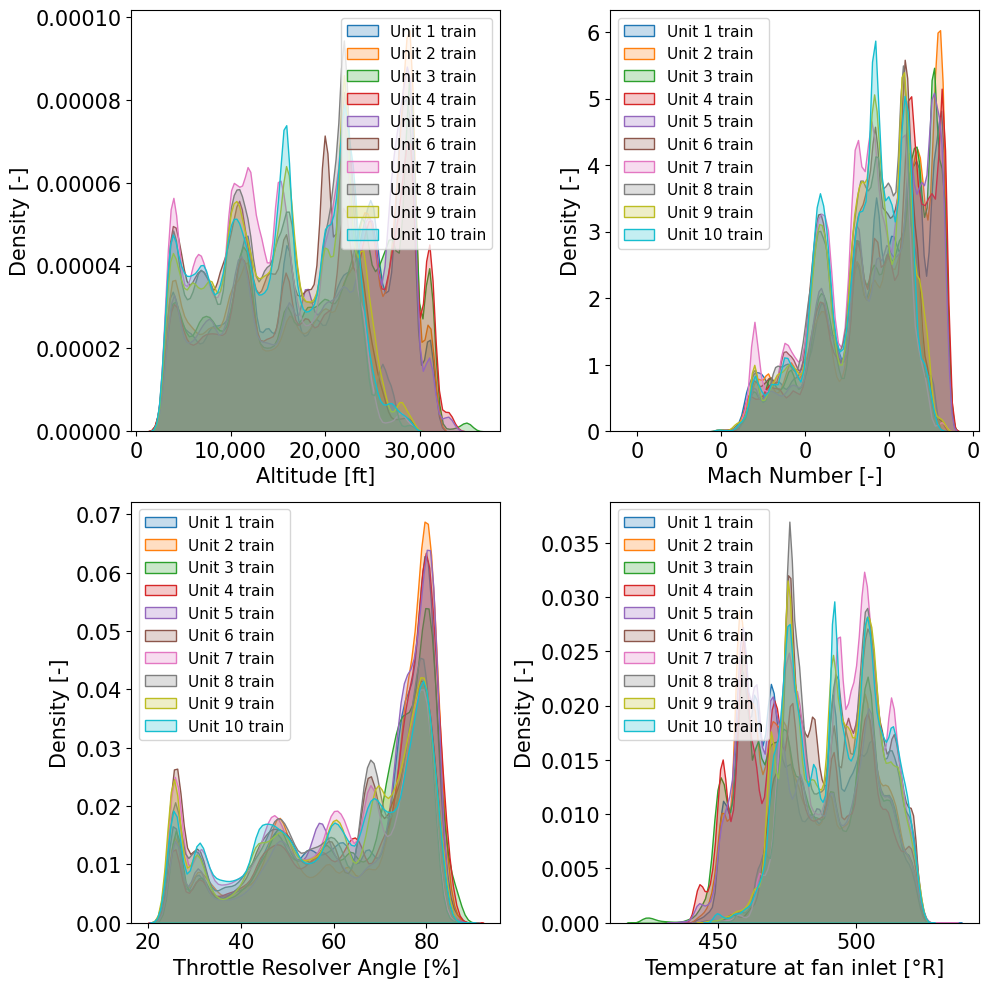

In [76]:
# Average flgiht time per cycle (flight)
avg_time_dict = {}

for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

    temp_num_cycles = len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle']))
    df_unit_temp =  df_all[df_all['unit'] == np.float64(i) ]
    temp_avg_time = int(df_unit_temp.shape[0]/temp_num_cycles)
    avg_time_dict['Unit '+ str(int(i))] = temp_avg_time

print (avg_time_dict)
avg_time_dict = dict(sorted(avg_time_dict.items(), key=lambda item: item[1]))

fig = plt.figure(figsize=(6,6))  
plt.bar(list(avg_time_dict.keys()), avg_time_dict.values())
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Average flight time (seconds)' , fontdict = {'fontsize' : 15})
plt.xlabel('Unit' , fontdict = {'fontsize' : 15})
plt.show()

variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = []
for u in units:
  if str(int(u)) == '11' or str(int(u)) == '14' or str(int(u)) == '15':
    leg.append('Unit ' + str(int(u)) + ' test')
  else:
    leg.append('Unit ' + str(int(u)) + ' train')


# leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=15, name='kde_DS02.png')

In [77]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()


def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

<Figure size 640x480 with 0 Axes>

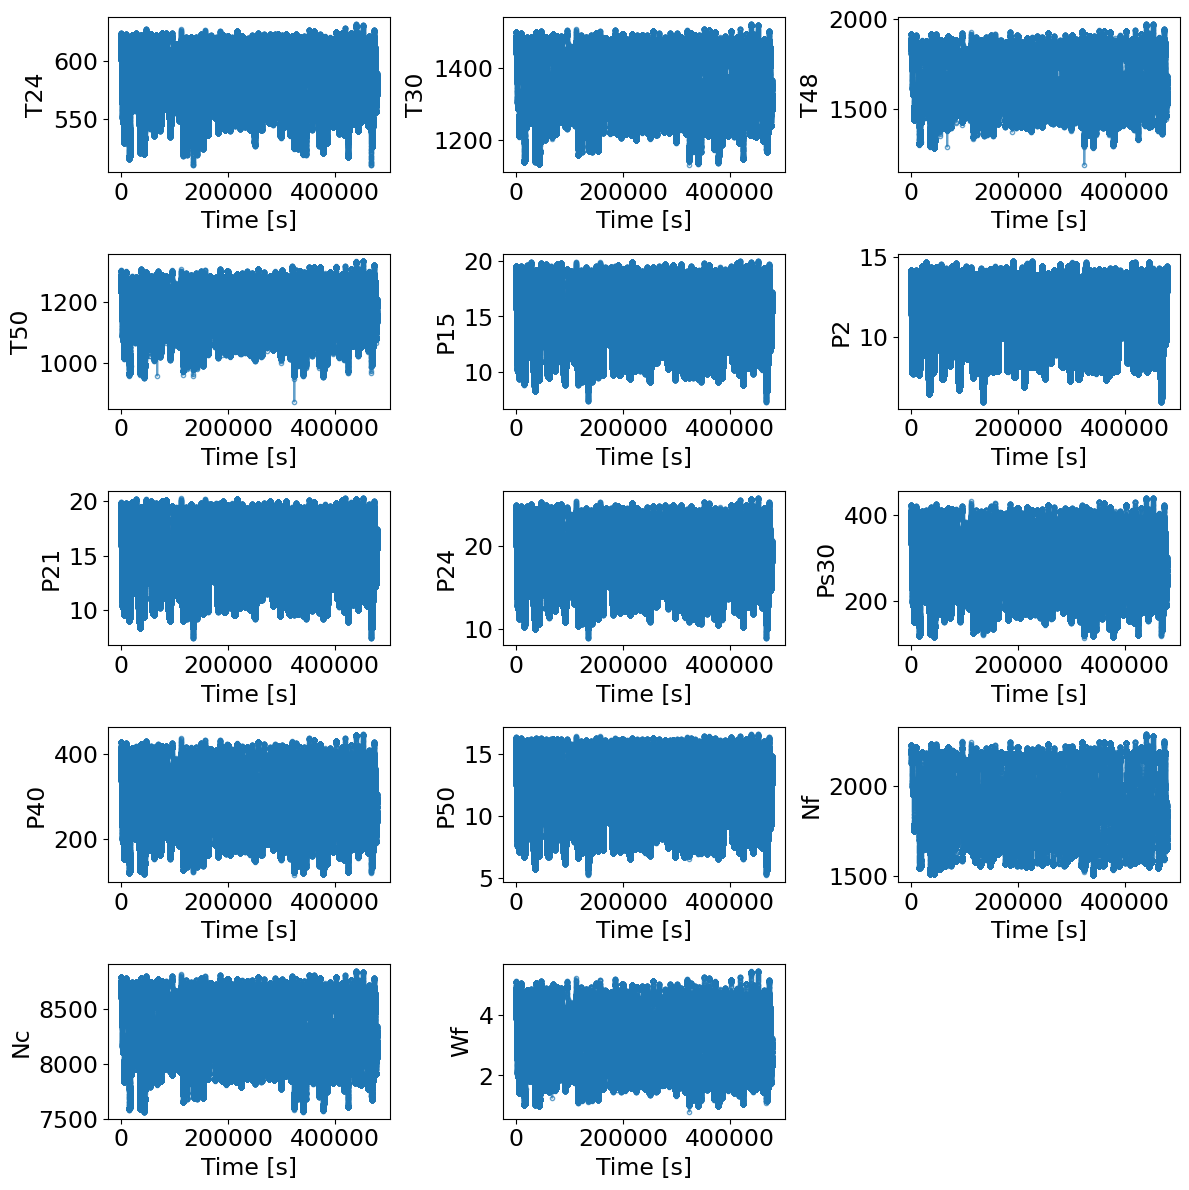

<Figure size 640x480 with 0 Axes>

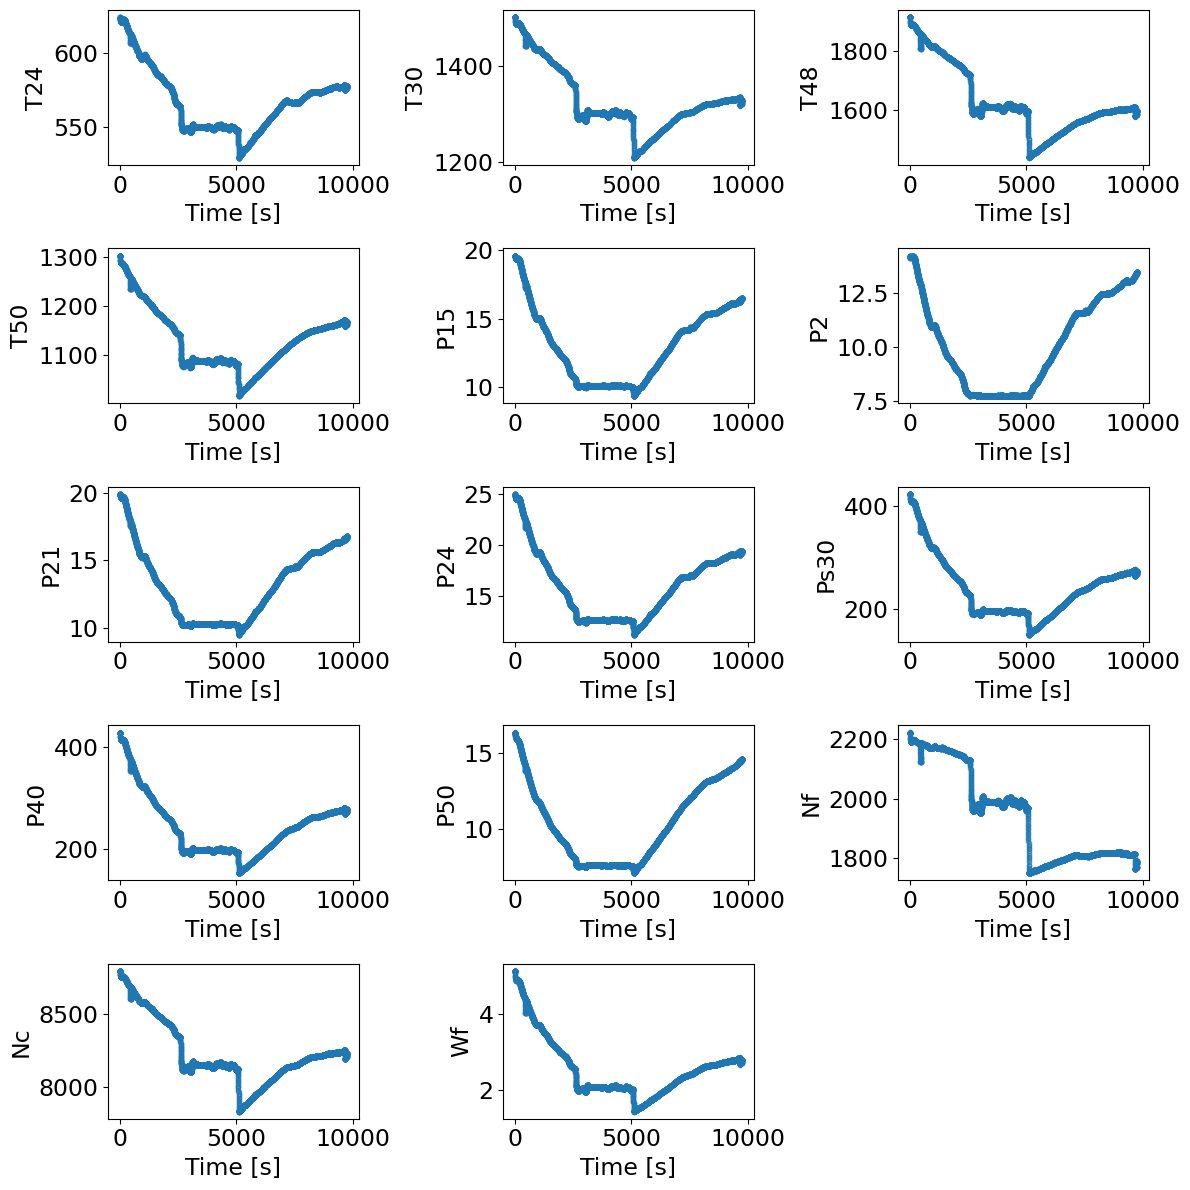

In [78]:

'''
Sensor readings ( Xs ) of Unit 2
'''
df_X_s_u = df_Xs.loc[df_A.unit == 10]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

#Single flight cycle
df_X_s_u_c = df_Xs.loc[(df_A.unit == 10) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)
     